# Try your data


## Before we start
Before we start, we also recommend that users could browse notebooks for [cross species](https://colab.research.google.com/drive/1qsBg-_6NxVFUJCk0tbTyQ7vY8_FLnrc9#scrollTo=LxApzZBIGv6W), [cross modalities](https://colab.research.google.com/drive/14NWqdbkpsdt0cS4-SLCvcDmHLU05UlmV?usp=sharing), [cross MR scanners](https://colab.research.google.com/drive/1xrREREKEs0HvDvhxA0sGCLsIdAFNLd2w?usp=sharing), etc.

We provide all trained weight here via [Google Drive](https://drive.google.com/file/d/1aBrvDWtXRcLbwj3lKCln9SIcF-WWOt1D/view?usp=sharing). Users can deploy BEN as an out-of-the-box tool instantly if their data domain are contained within the after-mentioned lists.

In detail, for the introduction of a new dataset, we suggest that the user do as follows.

1. First, use BEN to load the pretrained weights for the closest corresponding species. (See details in [Case 1](#2.0))
2. Consider labeling several scans to fine-tune the model if the pretrained weights do not yield satisfactory performance or the target species is beyond the scope of our datasets. The domain transfer procedures will be performed automatically, without human intervention. (See details in [Case 2](#3.0))

Pretrained weight list:


| Mouse            | Rat            | Marmoset           | Macaque           | Human                                          |
|------------------|----------------|--------------------|-------------------|------------------------------------------------|
| Mouse-T2WI-11.7T | Rat-T2WI-11.7T | Marmoset-T2WI-9.4T | Macaque-T1WI-4.7T | Human-T1WI-3T <br/>(trained on three datasets) |
| Mouse-T2WI-9.4T  | Rat-T2WI-9.4T  | Marmoset-EPI-9.4T  | Macaque-T1WI-3T   | Human-T1WI-ABCD-3T                             |
| Mouse-T2WI-7T    | Rat-T2WI-7T    |                    | Macaque-T1WI-1.5T | Human-T1WI-UKB-3T                              |
| Mouse-EPI-11.7T  | Rat-EPI-9.4T   |                    |                   | Human-T1WI-ZIB-3T                              |
| Mouse-EPI-9.4T   |                |                    |                   |                                                |
| Mouse-SWI-11.7T  |                |                    |                   |                                                |
| Mouse-ASL-11.7T  |                |                    |                   |                                                |




---
<font size=5>Table of Contents</font>

* [1.0 Set up](#1.0)
  * [1.1 Verify Runtime Settings](#1.1)
  * [1.2 Set up environment and install all necessary packages](#1.2)
  * [1.3 Download code from github](#1.3)
  * [1.4 Download pretrained weight](#1.4)
* [2.0 Case 1: your dataset domain is in our released pretrain weight or you have update weight in previous steps from other notebookes.](#2.0)
  * [2.1 Upload your MR data](#2.1)
  * [2.2 Run BEN inference](#2.2)
  * [2.3 Visualize the output](#2.3)
* [3.0 Case 2: The pretrained weights do not yield satisfactory performance or the target species is beyond the scope of our datasets.](#3.0)
  * [3.1 Upload your MR data and label](#2.1)
  * [3.2 Run BEN domain adaptation](#2.2)
  * [3.3 Run BEN infertence (using new weight)](#3.3)
  * [3.4 Visualize the output](#3.4)

* [4.0 Conclusion](#4.0)

* [5.0 (Optional) Download new weight](#5.0)

---

<a name='1.0'></a>
# 1.0 Set up

<a name='1.1'></a>
## 1.1 Verify Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 

See your Hardware Accelerator in Edit/Notebook settings in Colab Menu(On the upper left usually).

<a name='1.2'></a>
## 1.2 Set up environment and install all necessary packages

After installation, you might **<font color='#FF000'> need to restart </font>** the runtime in order to use newly installed versions (Tensorflow 1.15).



In [ ]:
!pip install SimpleITK tensorflow-gpu==1.15.4 keras==2.2.4 h5py==2.10 scikit-image==0.16.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a name='1.3'></a>

## 1.3 Download code from github.

In [ ]:
!git clone https://github.com/yu02019/BEN.git

Cloning into 'BEN'...
remote: Enumerating objects: 333, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 333 (delta 13), reused 28 (delta 5), pack-reused 287
Receiving objects: 100% (333/333), 12.57 MiB | 13.31 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [ ]:
cd BEN

/content/BEN


<a name='1.4'></a>
## 1.4 Download pretrained weight


In [ ]:
!gdown --id 1jKE1lbJqHWbeiRN2_Rx-3lS-50sgTa4Y
!sh download_pretrained_weight.sh

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1jKE1lbJqHWbeiRN2_Rx-3lS-50sgTa4Y
To: /content/BEN/download_pretrained_weight.sh
100% 118/118 [00:00<00:00, 166kB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1aBrvDWtXRcLbwj3lKCln9SIcF-WWOt1D
To: /content/BEN/weight/weight.zip
100% 208M/208M [00:01<00:00, 158MB/s]
Archive:  weight.zip
   creating: Human-ABCDuni+-%10-DA_09131148/
  inflating: Human-ABCDuni+-%10-DA_09131148/.hdf5  
   creating: Human-ZIB_2022_07182107/
  inflating: Human-ZIB_2022_07182107/.hdf5  
   creating: Human_UKB_

In [ ]:
import os
import logging
import warnings
import tensorflow as tf

warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # tf log errors only
logging.getLogger('tensorflow').setLevel(logging.ERROR)
print(tf.__version__)

1.15.4


<a name='2.0'></a> 

# 2.0 Case 1: your dataset domain is in our released pretrain weight or you have update weight in previous steps from other notebookes.

<a name='2.1'></a>

## 2.1 Upload your MR data

Or use our [demo data](https://drive.google.com/file/d/1YMxJGG22SGNcZnkcUR-Fj4Rb0q3yHhu1/view?usp=sharing) here (download, unzip them and upload all 'xxx.nii.gz' files to Colab via the following Cell).

BEN supports *'.nii'* and *'.nii.gz'* formats. The uploaded files will be saved in one folder.


In [ ]:
import os
from google.colab import files
import shutil

basepath = os.getcwd()

# Define where to save your uploaded data
upload_path = os.path.join(basepath, "dataset", "upload")
upload_output_path = os.path.join(basepath, "dataset_output")

if os.path.isdir(upload_output_path):
    shutil.rmtree(upload_output_path)

if os.path.isdir(upload_path):
    shutil.rmtree(upload_path)

os.makedirs(upload_output_path)
os.makedirs(upload_path)

uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(os.path.join(basepath, filename), os.path.join(upload_path, filename))

Saving POLYIC_20190510_mouse32__E2_P1.nii.gz to POLYIC_20190510_mouse32__E2_P1.nii.gz
Saving POLYIC_20190510_mouse34__E2_P1.nii.gz to POLYIC_20190510_mouse34__E2_P1.nii.gz
Saving POLYIC_20190510_mouse35__E3_P1.nii.gz to POLYIC_20190510_mouse35__E3_P1.nii.gz


<a name='2.2'></a>

## 2.2 Run BEN inference

Usage
```python
python BEN_infer.py -i input_folder -o output_folder -model weigth_path [other parameters]
```

In [ ]:
!python BEN_infer.py -i dataset/upload/ -o dataset_output/ -model weight/Mouse_T2WI_117T_fp32_all_BN_NoCenterScale_polyic_epoch15_bottle256_04012056/



1.15.4
Object will save in (Existing) folder/print(save_filename):	 dataset_output/
Finding  3  nii.gz format files.	
Reading:	 POLYIC_20190510_mouse32__E2_P1.nii.gz
(35, 180, 180)
Reading:	 POLYIC_20190510_mouse34__E2_P1.nii.gz
(35, 180, 180)
Reading:	 POLYIC_20190510_mouse35__E3_P1.nii.gz
(35, 180, 180)
Done.

**********	Inferring CT/MRI scans:	**********


**********	 3 file(s) to save: 	**********

Saving:	 (35, 180, 180)
Saving:	 (35, 180, 180)
Saving:	 (35, 180, 180)

**********	 Done. 	**********



<a name='2.3'></a>

## 2.3 Visualize the output

Input raw MR scan: No.1


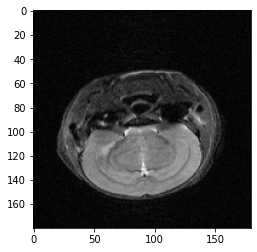

Brain mask: No.1


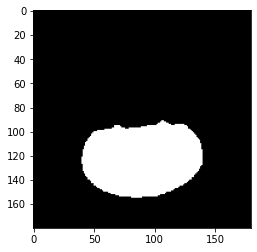

Input raw MR scan: No.2


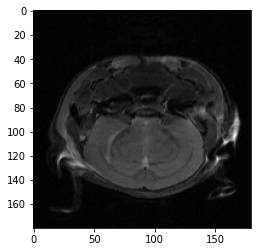

Brain mask: No.2


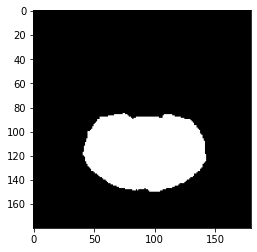

Input raw MR scan: No.3


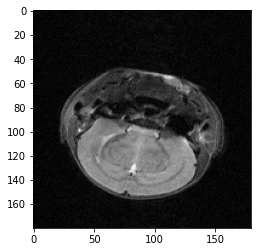

Brain mask: No.3


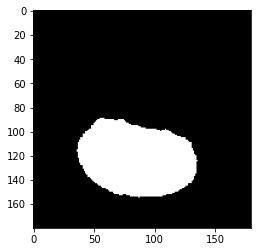

In [ ]:
from utils.load_data import get_itk_array
import matplotlib.pyplot as plt
from glob import glob

input_files = glob(upload_path + '/*')
output_files = glob(upload_output_path + '/*')

for num_id in range(len(input_files)):
  slice_id = 15
  before = get_itk_array(input_files[num_id])
  after = get_itk_array(output_files[num_id])

  print('Input raw MR scan: No.{}'.format(num_id + 1))
  plt.imshow(before[slice_id], cmap='gray');plt.show()
  print('Brain mask: No.{}'.format(num_id + 1))
  plt.imshow(after[slice_id], cmap='gray');plt.show()

Even if the raw MR scans are not processed by N4BiasFieldCorrection, alignment/registration, etc, BEN could still perform well.

<a name='3.0'></a>

# 3.0 Case 2: The pretrained weights do not yield satisfactory performance or the target species is beyond the scope of our datasets.

Consider labeling several representative* scans to fine-tune the model.

The domain transfer procedures will be performed automatically, without human intervention.

(*: representative scans should cover the characteristics of customer clinical center data as comprehensive as possible, e,g, different location/position, contrast, field bias caused by low temperature coils, etc.)

<a name='3.1'></a>

## 3.1 Upload your MR data and label

Or use our [marmoset fMRI demo data](https://drive.google.com/file/d/1SVWFPQf5_eqOJvyrEi9GiXzjJaj8wCUR/view?usp=sharing) here (download, unzip them and upload 'xxx.nii.gz' files in 'train' folder to Colab via the following Cell).

BEN supports *'.nii'* and *'.nii.gz'* formats. The uploaded files will be saved in one folder.


In [ ]:
import os
from google.colab import files
import shutil

basepath = os.getcwd()

# Define where to save your uploaded data
train_folder = os.path.join(basepath, "dataset", "train")

if os.path.isdir(train_folder):
    shutil.rmtree(train_folder)

os.makedirs(train_folder)

uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(os.path.join(basepath, filename), os.path.join(train_folder, filename))

Saving 2dseq_01_1.nii.gz to 2dseq_01_1.nii.gz
Saving 2dseq_02_1.nii.gz to 2dseq_02_1.nii.gz


Upload label (if use demo data, select all 'xxx.nii.gz' files in 'label' folder)

In [ ]:
# Define where to save your uploaded data
label_folder = os.path.join(basepath, "dataset", "label")

if os.path.isdir(label_folder):
    shutil.rmtree(label_folder)

os.makedirs(label_folder)

uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(os.path.join(basepath, filename), os.path.join(label_folder, filename))

Saving 2dseq_01_1.nii.gz to 2dseq_01_1.nii.gz
Saving 2dseq_02_1.nii.gz to 2dseq_02_1.nii.gz


Upload test data (if use demo data, select all 'xxx.nii.gz' files in 'test' folder)

In [ ]:
# Define where to save your uploaded data
label_folder = os.path.join(basepath, "dataset", "test")
upload_output_path = os.path.join(basepath, "dataset_output")

if os.path.isdir(upload_output_path):
    shutil.rmtree(upload_output_path)

if os.path.isdir(label_folder):
    shutil.rmtree(label_folder)

os.makedirs(label_folder)
os.makedirs(upload_output_path)

uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(os.path.join(basepath, filename), os.path.join(label_folder, filename))

Saving 2dseq_03_1.nii.gz to 2dseq_03_1.nii.gz


<a name='3.2'></a>

## 3.2 Run BEN domain adaptation

Usage:
```python
python BEN_DA.py -t train_folder -l label_folder -source source_domain_weight [-prefix new_model_name_prefix]
```

In [ ]:
!python BEN_DA.py -t /content/BEN/dataset/train -l /content/BEN/dataset/label -source weight/Marmoset-EPI-94T_2022_07191209/.hdf5 -prefix new_model

1.15.4
Finding  2  nii.gz format files.	
Reading:	 2dseq_01_1.nii.gz
(38, 72, 56)
Reading:	 2dseq_02_1.nii.gz
(38, 72, 56)
Done.
len of nii_path:	 2
Reading:	 2dseq_01_1.nii.gz
(38, 72, 56)
Reading:	 2dseq_02_1.nii.gz
(38, 72, 56)
Done.

**********	Inferring CT/MRI scans:	**********

Trainable lay:  batch_normalization
Trainable lay:  batch_normalization_1
Trainable lay:  batch_normalization_2
Trainable lay:  batch_normalization_3
Trainable lay:  batch_normalization_4
Trainable lay:  batch_normalization_5
Trainable lay:  batch_normalization_6
Trainable lay:  batch_normalization_7
Trainable lay:  batch_normalization_8
Trainable lay:  batch_normalization_9
Only finetune BN on target domain!
Using TensorFlow backend.
Train on 68 samples, validate on 8 samples
Epoch 1/30
68/68 [==============================] - 5s 70ms/sample - loss: 0.0912 - dice_coef: 0.9531 - val_loss: 0.0520 - val_dice_coef: 0.9577
Epoch 2/30
68/68 [==============================] - 0s 4ms/sample - loss: 0.0964 - dice_

<a name='3.3'></a>

## 3.3 Run BEN infertence (using new weight)

New weight will be saved at /content/BEN/weight/

Note: Please check the newly saved weight name and **update** following weight path

In [ ]:
!python BEN_infer.py -i dataset/test -o dataset_output -model weight/new_model_07280214/.hdf5



1.15.4
Object will save in (Existing) folder/print(save_filename):	 dataset_output
Finding  1  nii.gz format files.	
Reading:	 2dseq_03_1.nii.gz
(38, 72, 56)
Done.

**********	Inferring CT/MRI scans:	**********


**********	 1 file(s) to save: 	**********

Saving:	 (38, 72, 56)

**********	 Done. 	**********



<a name='3.4'></a>

## 3.4 Visualize the output

Input raw MR scan: Slice 0


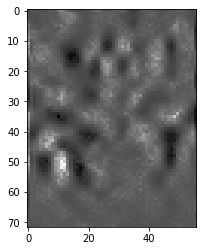

Brain mask: Slice 0


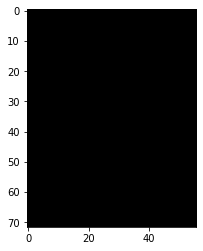

Input raw MR scan: Slice 5


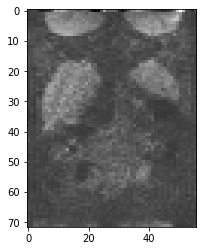

Brain mask: Slice 5


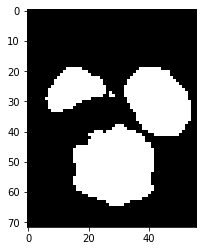

Input raw MR scan: Slice 10


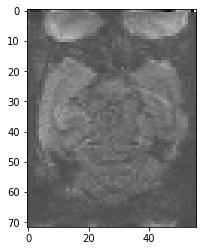

Brain mask: Slice 10


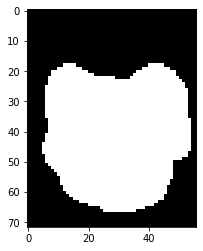

Input raw MR scan: Slice 15


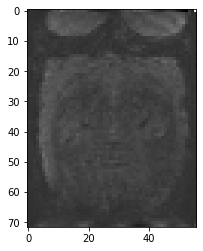

Brain mask: Slice 15


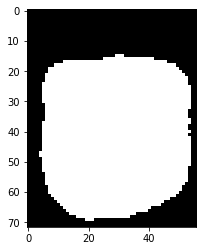

Input raw MR scan: Slice 20


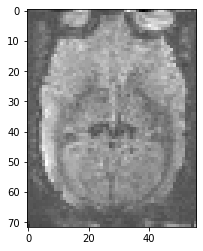

Brain mask: Slice 20


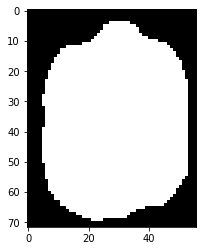

Input raw MR scan: Slice 25


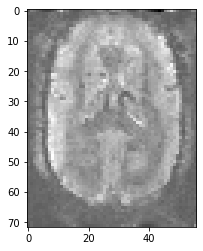

Brain mask: Slice 25


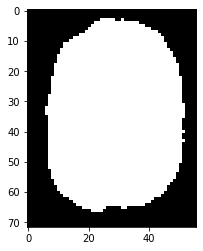

In [ ]:
from utils.load_data import get_itk_array
import matplotlib.pyplot as plt
from glob import glob

input_files = glob(train_folder + '/*')
output_files = glob(upload_output_path + '/*')

num_id = 0

for slice_id in [0, 5, 10, 15, 20, 25]:

  before = get_itk_array(input_files[num_id])
  after = get_itk_array(output_files[num_id])

  print('Input raw MR scan: Slice {}'.format(slice_id))
  plt.imshow(before[slice_id], cmap='gray');plt.show()
  print('Brain mask: Slice {}'.format(slice_id))
  plt.imshow(after[slice_id], cmap='gray');plt.show()

<a name='4.0'></a>

# 4.0 Conclusion

BEN could transfer to various MR scans with different contrasts from different clinical centers.

Due to the robustness of BEN, even if the raw MR scans are not processed by N4BiasFieldCorrection, alignment/registration, etc, BEN could still perform well.



<a name='5.0'></a>
# 5.0 (Optional) Download new weight

After updating weight [1], BEN has already deployed on this new domain. You can download this weight to use next time without the abovementioned steps.

[1] In practice, we recommend using 4~6 representative target domain labels for domain adaptation. We also provide a semi-supervised or human-in-the-loop manner to deploy BEN.

In [ ]:
import os
from google.colab import files

new_weight_folder = glob('weight/new_model*')
print(new_weight_folder)
os.system(f"zip -r -j download.zip {new_weight_folder}/*")
files.download("/content/BEN/weight/weight.zip")

['weight/new_model_07280214']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>